In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot
from xgboost import plot_importance

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

C:\Users\sylvia\anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [18]:
input_file='D:/学习资料/DataScience/TB2/Mini-project/model/daily_data.csv'

data=pd.read_csv(input_file)
data = data.drop(['avg_AQI'],axis=1)

In [19]:
print(data.isna().sum())
data

Year                                   0
Month                                  0
Day                                    0
left_ZipCode                           0
Hour                                   0
max_AQI                                0
Hourly Flow                            0
Hourly Profile                         0
Temperature                            0
Dewpoint Temperature                   0
Wind Speed                             0
Visibility                             0
Wind Chill Temperature                 0
Relative Humidity                      0
Daily lab-confirmed cases              0
Cumulative lab-confirmed cases         0
Cumulative lab-confirmed cases rate    0
dtype: int64


,Year,Month,Day,left_ZipCode,Hour,max_AQI,Hourly Flow,Hourly Profile,Temperature,Dewpoint Temperature,Wind Speed,Visibility,Wind Chill Temperature,Relative Humidity,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
0,2019,1,1,BS1,11.500000,8,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
1,2019,1,1,BS14,11.500000,8,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
2,2019,1,1,BS16,11.500000,8,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
3,2019,1,1,BS2,11.500000,8,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
4,2019,1,1,BS3,11.500000,8,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556,2022,12,31,BS14,7.500000,2,380.424492,359.774018,10.906250,10.062500,5.437500,8.0625,10.562500,89.806791,0.0,0.0,0.0
8557,2022,12,31,BS16,7.500000,2,380.424492,359.774018,10.906250,10.062500,5.437500,8.0625,10.562500,89.806791,0.0,0.0,0.0
8558,2022,12,31,BS2,7.741935,3,380.136398,359.575466,10.935484,10.129032,5.435484,8.0000,10.580645,89.848045,0.0,0.0,0.0
8559,2022,12,31,BS3,7.500000,2,380.424492,359.774018,10.906250,10.062500,5.437500,8.0625,10.562500,89.806791,0.0,0.0,0.0


In [20]:
#Encode the ZipCode
le = LabelEncoder()

cols_to_transform = ['left_ZipCode']

data['left_ZipCode'] = data['left_ZipCode'].astype(str)

data[cols_to_transform] = data[cols_to_transform].apply(lambda x: le.fit_transform(x.astype(str)))
data=data.fillna(0)

In [60]:
X = data.drop(['max_AQI'], axis=1)
y = data['max_AQI']

In [22]:
X

,Year,Month,Day,left_ZipCode,Hour,Hourly Flow,Hourly Profile,Temperature,Dewpoint Temperature,Wind Speed,Visibility,Wind Chill Temperature,Relative Humidity,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
0,2019,1,1,0,11.500000,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
1,2019,1,1,1,11.500000,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
2,2019,1,1,2,11.500000,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
3,2019,1,1,3,11.500000,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
4,2019,1,1,4,11.500000,316.196500,330.159704,7.041667,5.875000,4.286583,9.9940,4.247292,85.429167,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556,2022,12,31,1,7.500000,380.424492,359.774018,10.906250,10.062500,5.437500,8.0625,10.562500,89.806791,0.0,0.0,0.0
8557,2022,12,31,2,7.500000,380.424492,359.774018,10.906250,10.062500,5.437500,8.0625,10.562500,89.806791,0.0,0.0,0.0
8558,2022,12,31,3,7.741935,380.136398,359.575466,10.935484,10.129032,5.435484,8.0000,10.580645,89.848045,0.0,0.0,0.0
8559,2022,12,31,4,7.500000,380.424492,359.774018,10.906250,10.062500,5.437500,8.0625,10.562500,89.806791,0.0,0.0,0.0


In [23]:
# use LinearRegression to fill na values 
'''
X.replace('', np.nan, inplace=True)

for column in X.columns:
    if X[column].isnull().sum() > 0:
        lm = LinearRegression()
        X_train = X[X[column].notnull()]
        y_train = X_train.pop(column)
        X_test = X[X[column].isnull()]
        X_train = X_train.select_dtypes(include=np.number)
        X_test = X_test.select_dtypes(include=np.number)
        lm.fit(X_train, y_train)
        X.loc[X[column].isnull(), column] = lm.predict(X_test.select_dtypes(include=np.number))
'''

"\nX.replace('', np.nan, inplace=True)\n\nfor column in X.columns:\n    if X[column].isnull().sum() > 0:\n        lm = LinearRegression()\n        X_train = X[X[column].notnull()]\n        y_train = X_train.pop(column)\n        X_test = X[X[column].isnull()]\n        X_train = X_train.select_dtypes(include=np.number)\n        X_test = X_test.select_dtypes(include=np.number)\n        lm.fit(X_train, y_train)\n        X.loc[X[column].isnull(), column] = lm.predict(X_test.select_dtypes(include=np.number))\n"

In [24]:
# split the train and test set
train = data.loc[(data.Year <= 2022) & (data.Month < 9)]
test = data.loc[(data.Year == 2022) & (data.Month >= 9)]

In [25]:
# delete max_AQI  from datasets
X_train = train.drop('max_AQI', axis=1)
y_train = train['max_AQI']
X_test = test.drop('max_AQI', axis=1)
y_test = test['max_AQI']

In [26]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth': 5, 'eta': 0.1, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

# predict
y_pred = bst.predict(dtest)

C:\Users\sylvia\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)


MSE: 7.941256830601093
RMSE: 2.818023568141525


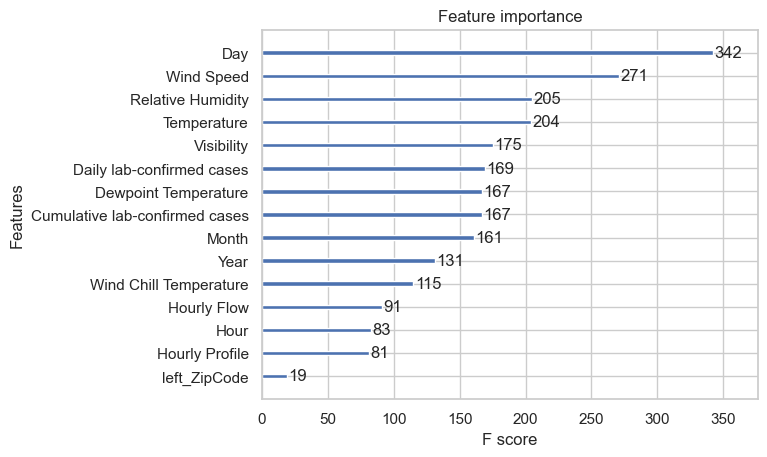

In [30]:
xgb.plot_importance(bst)
plt.show()

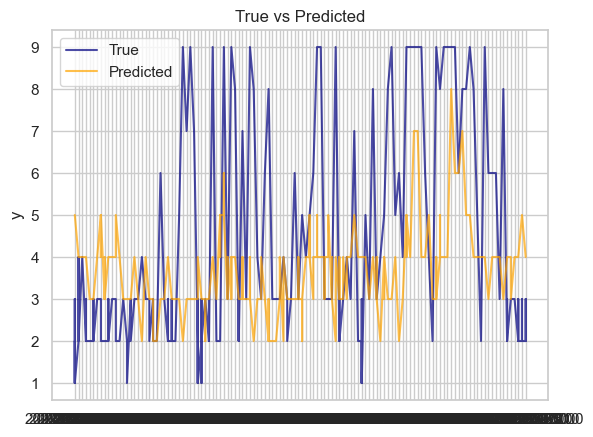

In [41]:
# combine year, month, and day into a single feature
dates_train = X_train.apply(lambda row: str(row['Year']) + '-' + str(row['Month']) + '-' + str(row['Day']), axis=1)
dates_test = X_test.apply(lambda row: str(row['Year']) + '-' + str(row['Month']) + '-' + str(row['Day']), axis=1)

# plot true values
plt.plot(dates_test, y_test, '-', label='True', color='navy', alpha=0.7, markersize=10)
# plot predicted values
plt.plot(dates_test, y_pred, '-', label='Predicted', color='orange', alpha=0.7, markersize=10)

plt.title('True vs Predicted')
plt.xlabel('')
plt.ylabel('y')
plt.legend()
plt.show()



F Score: 0.13288132672523198


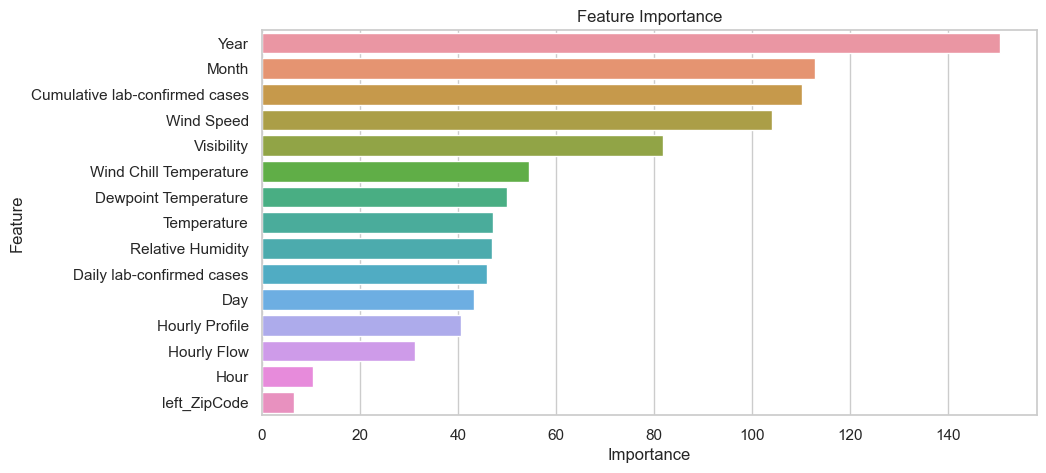

In [27]:
# compute F score
from sklearn.metrics import f1_score

y_pred = np.round(y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')

# compute feature importance
importance = bst.get_score(importance_type='gain')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
importance = pd.DataFrame(importance, columns=['feature', 'importance'])

# plot feature importance
sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# save feature importance image
plt.savefig('XGboost_feature_importance.png',bbox_inches='tight',transparent=True)

# print F score
print('F Score:', f_score)

In [ ]:
#Save the image
fig2.get_figure().savefig('feature_inportance.png',bbox_inches='tight',transparent=True)
#bbox_inches让图片显示完整，transparent=True让图片背景透明